In [2]:
import pandas as pd

df=pd.read_csv("D:\\Customer_spending_projects\\Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values 
df_filled = df.fillna(0)

# Option 3: Drop columns if they have too many missing values 
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# Remove duplicates
df_cleaned = df.drop_duplicates()


Number of Duplicate Rows: 0


In [42]:
# Step 1: Check for null values in the 'Year' column
null_years = df_filtered_no_outliers['Year'].isnull().sum()
print(f"Number of null values in 'Year' column: {null_years}")

# Step 2: Drop rows where 'Year' is null
df_cleaned_final = df_filtered_no_outliers.dropna(subset=['Year'])

# Step 3: Verify that null values are removed
null_years_after = df_cleaned_final['Year'].isnull().sum()
print(f"Number of null values in 'Year' column after dropping: {null_years_after}")

# Optional: Save the final cleaned DataFrame to CSV or Excel
df_cleaned_final.to_csv("D:\\Customer_spending_projects\\cleaned_sales_data.csv", index=False)


Number of null values in 'Year' column: 5306
Number of null values in 'Year' column after dropping: 0


In [47]:
df=pd.read_csv("D:\\Customer_spending_projects\\cleaned_sales_data.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2013.0,9.0
1,5,US-2012-108966,2012-11-10,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2012.0,11.0
2,6,CA-2011-115812,2011-09-06,NaN,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2011.0,9.0
3,7,CA-2011-115812,2011-09-06,NaN,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2011.0,9.0
4,9,CA-2011-115812,2011-09-06,NaN,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,2011.0,9.0


In [48]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Convert 'Sales', 'Quantity', 'Discount', and 'Profit' to numeric 
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Verify data types
print("Data Types after Conversion:")
print(df.dtypes)


Data Types after Conversion:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                    float64
Month                   float64
dtype: object


In [45]:
# Show rows with any null values
null_rows = df_cleaned_final[df_filtered_no_outliers.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)


Rows with null values:
      Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
4          5  US-2012-108966 2012-11-10       NaT  Standard Class    SO-20335   
5          6  CA-2011-115812 2011-09-06       NaT  Standard Class    BH-11710   
6          7  CA-2011-115812 2011-09-06       NaT  Standard Class    BH-11710   
8          9  CA-2011-115812 2011-09-06       NaT  Standard Class    BH-11710   
9         10  CA-2011-115812 2011-09-06       NaT  Standard Class    BH-11710   
...      ...             ...        ...       ...             ...         ...   
9957    9958  US-2011-143287 2011-11-11       NaT  Standard Class    KN-16705   
9958    9959  US-2011-143287 2011-11-11       NaT  Standard Class    KN-16705   
9967    9968  CA-2014-153871 2014-12-12       NaT  Standard Class    RB-19435   
9969    9970  CA-2014-153871 2014-12-12       NaT  Standard Class    RB-19435   
9972    9973  CA-2013-130225 2013-12-09       NaT  Standard Class    RC-19960   

    

C:\Users\shris\AppData\Local\Temp\ipykernel_23352\2900460329.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [49]:
# Example: Filter data for a specific region (e.g., 'West')
df_filtered_region = df[df['Region'] == 'West']

# Example: Filter out rows where sales or profit are zero or negative
df_filtered_positive_sales = df[(df['Sales'] > 0) & (df['Profit'] > 0)]


In [10]:
df_filtered_region.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2013-138688,NaT,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6,CA-2011-115812,2011-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2011-115812,2011-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2011-115812,2011-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2011-115812,2011-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


In [50]:
# Detect outliers using IQR (Interquartile Range) for 'Sales'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered_no_outliers = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print(f"Outliers in Sales Removed. Data Size: {df_filtered_no_outliers.shape}")


Outliers in Sales Removed. Data Size: (3216, 23)


In [51]:
# Example: Product sales analysis on cleaned data
product_sales = df_cleaned.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)


In [52]:
# Group by 'Product Name' and calculate total sales
product_sales = df_filtered_no_outliers.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Top 10 selling products
top_10_products = product_sales.head(10)

print("Top 10 Selling Products (Cleaned Data):")
print(top_10_products)


Top 10 Selling Products (Cleaned Data):
Product Name
Staples                                            2880.894
Tennsco Industrial Shelving                        1085.802
Cisco SPA301                                       1029.534
Maxell 4.7GB DVD-R                                 1004.652
Situations Contoured Folding Chairs, 4/Set          993.720
KI Adjustable-Height Table                          971.574
AT&T 17929 Lendline Telephone                       959.088
Xerox 1891                                          958.636
Hunt PowerHouse Electric Pencil Sharpener, Blue     926.712
Xerox 1893                                          860.790
Name: Sales, dtype: float64


In [53]:
# Group by 'Customer Name' and calculate total sales
customer_sales = df_filtered_no_outliers.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Top 10 customers by sales
top_10_customers = customer_sales.head(10)

print("Top 10 Customers by Sales (Cleaned Data):")
print(top_10_customers)


Top 10 Customers by Sales (Cleaned Data):
Customer Name
Paul Prost            1640.464
Becky Martin          1532.828
Jamie Frazer          1295.562
William Brown         1207.475
Barry FranzÃ¶sisch    1102.274
Laurel Beltran        1051.828
Sam Zeldin            1040.781
Ken Lonsdale          1031.691
Brian Thompson        1003.846
Karen Daniels          985.986
Name: Sales, dtype: float64


In [54]:
# Group by 'Country' and calculate total sales
country_sales = df_filtered_no_outliers.groupby('Country')['Sales'].sum().sort_values(ascending=False)

print("Sales by Country (Cleaned Data):")
print(country_sales)

# Similarly, for region and city:
region_sales = df_filtered_no_outliers.groupby('Region')['Sales'].sum().sort_values(ascending=False)
city_sales = df_filtered_no_outliers.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("Sales by Region (Cleaned Data):")
print(region_sales)
print("Top 10 Cities by Sales (Cleaned Data):")
top_10_cities = city_sales.head(10)
print(top_10_cities)


Sales by Country (Cleaned Data):
Country
United States    210604.3055
Name: Sales, dtype: float64
Sales by Region (Cleaned Data):
Region
West       68150.9135
East       64004.8140
Central    45315.0670
South      33133.5110
Name: Sales, dtype: float64
Top 10 Cities by Sales (Cleaned Data):
City
New York City    20980.6490
Los Angeles      15761.9760
Philadelphia     10990.6030
San Francisco     9863.4750
Seattle           9453.0600
Houston           8487.5702
Chicago           4671.5180
Springfield       4052.9790
San Diego         3820.6320
Detroit           3615.1120
Name: Sales, dtype: float64


In [16]:
# Group by year and month to analyze trends (ensure 'Order Date' is in datetime format)
sales_by_year = df_filtered_no_outliers.groupby(df_filtered_no_outliers['Order Date'].dt.year)['Sales'].sum()
sales_by_month = df_filtered_no_outliers.groupby([df_filtered_no_outliers['Order Date'].dt.year, df_filtered_no_outliers['Order Date'].dt.month])['Sales'].sum()
print("Sales by Year (Cleaned Data):")
print(sales_by_year)
print("Sales by Year and Month (Cleaned Data):")
print(sales_by_month)


Sales by Year (Cleaned Data):
Order Date
2011.0     65572.2077
2012.0     66815.1872
2013.0     86621.4430
2014.0    109147.5588
Name: Sales, dtype: float64
Sales by Year and Month (Cleaned Data):
Order Date  Order Date
2011.0      1.0            5316.7630
            2.0            5625.0680
            3.0            4386.5280
            4.0            5235.3860
            5.0            7502.9790
            6.0            3743.1370
            7.0            7745.5080
            8.0            7073.3530
            9.0            3819.3120
            10.0           3366.1250
            11.0           6147.2940
            12.0           5610.7547
2012.0      1.0            4089.8300
            2.0            5807.7640
            3.0            5426.7450
            4.0            3665.6080
            5.0            6394.2760
            6.0            5505.7022
            7.0            5260.3010
            8.0            6444.6070
            9.0            7479.3930
   

In [55]:
# Group by 'Ship Mode' and 'Segment' and calculate total sales
channel_sales = df_filtered_no_outliers.groupby('Ship Mode')['Sales'].sum()
segment_sales = df_filtered_no_outliers.groupby('Segment')['Sales'].sum()
print("Sales by Shipping Mode (Cleaned Data):")
print(channel_sales)
print("Sales by Segment (Cleaned Data):")
print(segment_sales)


Sales by Shipping Mode (Cleaned Data):
Ship Mode
First Class        34424.1310
Same Day           12204.5630
Second Class       40287.8695
Standard Class    123687.7420
Name: Sales, dtype: float64
Sales by Segment (Cleaned Data):
Segment
Consumer       110603.5195
Corporate       60046.9410
Home Office     39953.8450
Name: Sales, dtype: float64


In [56]:
# Total sales
total_sales = df_filtered_no_outliers['Sales'].sum()
# Total profit
total_profit = df_filtered_no_outliers['Profit'].sum()
# Average order value
average_order_value = df_filtered_no_outliers['Sales'].mean()
# Total number of orders
total_orders = df_filtered_no_outliers['Order ID'].nunique()
# Sales pipeline metrics
sales_pipeline_metrics = {
    'Total Sales': total_sales,
    'Total Profit': total_profit,
    'Average Order Value': average_order_value,
    'Total Orders': total_orders
}

print("Sales Pipeline Metrics (Cleaned Data):")
for metric, value in sales_pipeline_metrics.items():
    print(f"{metric}: {value:.2f}")


Sales Pipeline Metrics (Cleaned Data):
Total Sales: 210604.31
Total Profit: 28840.80
Average Order Value: 65.49
Total Orders: 1807.00


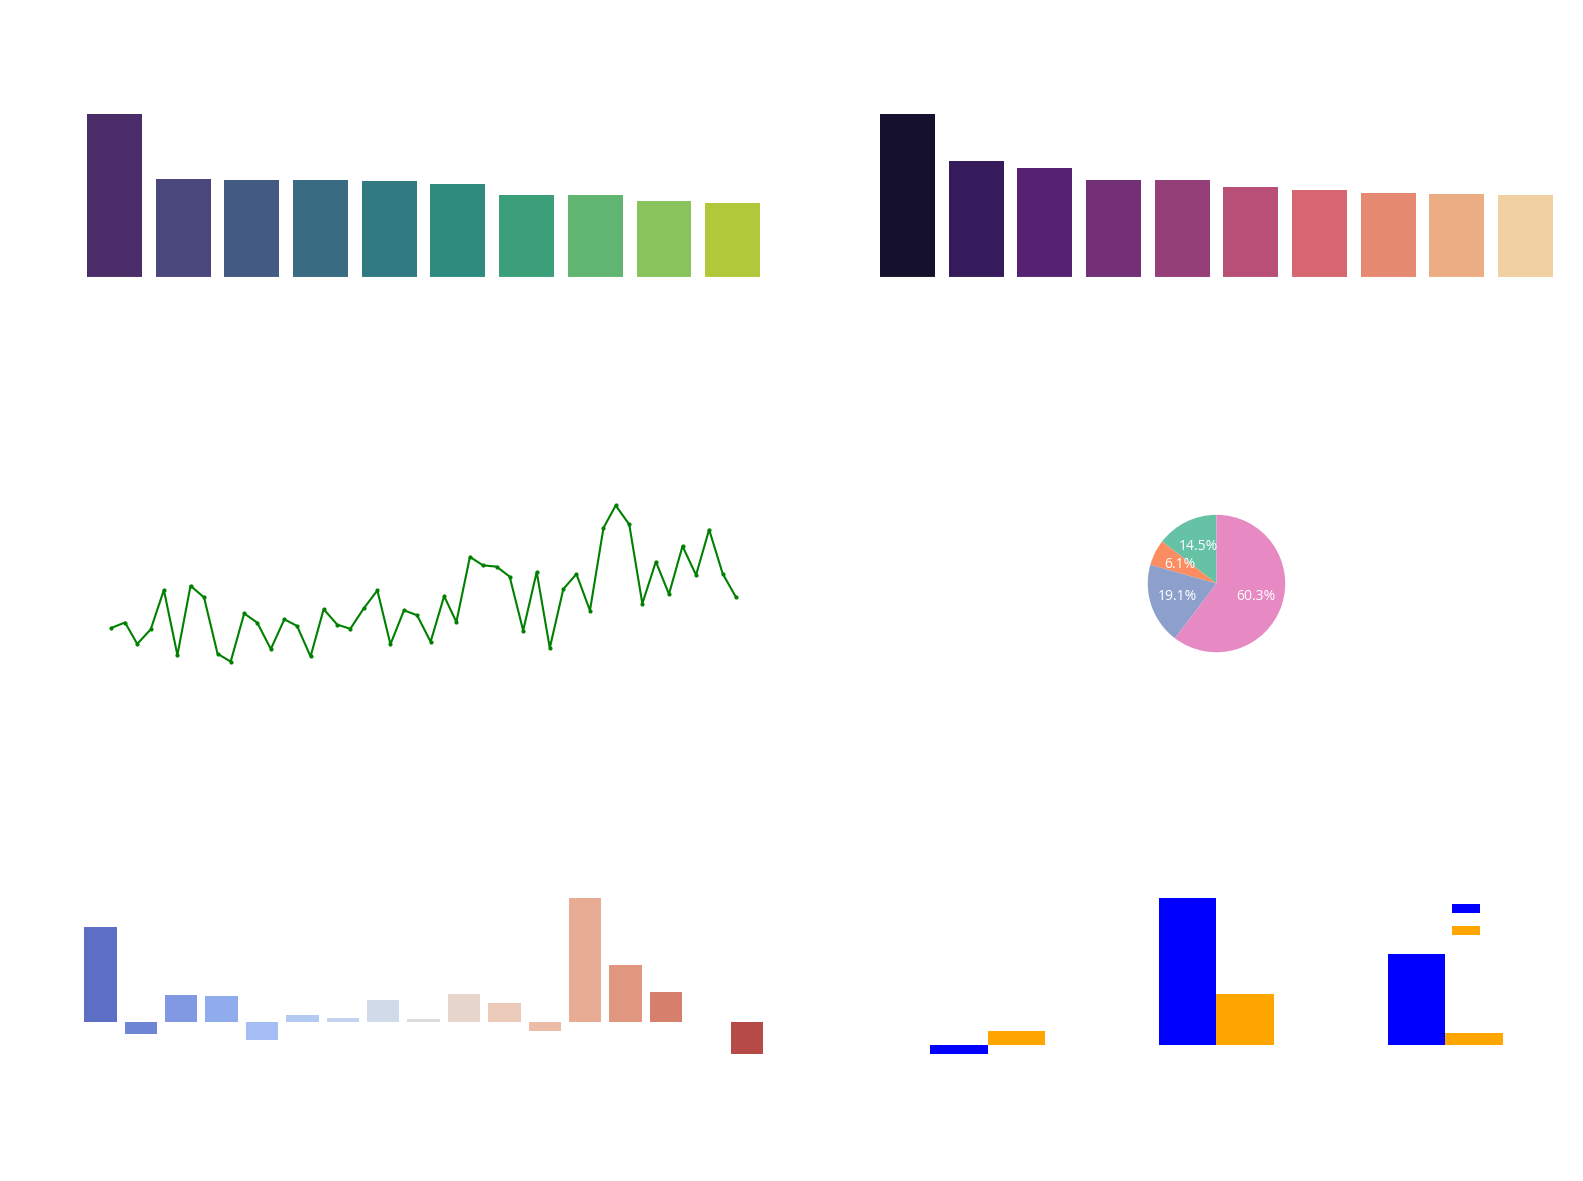

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data for Each Plot
# Product Sales Data
top_10_products = df_cleaned_final.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Shorten Product Names (limit to first 3 words for better visibility)
top_10_products['Short Product Name'] = top_10_products['Product Name'].apply(lambda x: ' '.join(x.split()[:3]) + '...' if len(x.split()) > 3 else x)

# Customer Sales Data
top_10_customers = df_cleaned_final.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()

# Time-Based Sales Data
df_cleaned_final['Order Date'] = pd.to_datetime(df_cleaned_final['Order Date'])
sales_by_month = df_cleaned_final.groupby(df_cleaned_final['Order Date'].dt.to_period("M"))['Sales'].sum().reset_index()

# Channel Sales Data
channel_sales = df_cleaned_final.groupby('Ship Mode')['Sales'].sum().reset_index()

# Profit by Sub-Category
profit_by_subcategory = df_cleaned_final.groupby('Sub-Category')['Profit'].sum().reset_index()

# Total Profit and Quantity by Category
total_profit_quantity_by_category = df_cleaned_final.groupby('Category').agg({'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# 2. Create Subplots Using Matplotlib and Seaborn
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # Create a 3x2 grid of subplots
fig.suptitle('Sales Analysis', fontsize=16)

# 3. Plot Top 10 Products by Sales
sns.barplot(data=top_10_products, x='Short Product Name', y='Sales', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Products by Sales')
axes[0, 0].set_xlabel('Product')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# 4. Plot Top 10 Customers by Sales
sns.barplot(data=top_10_customers, x='Customer Name', y='Sales', ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Top 10 Customers by Sales')
axes[0, 1].set_xlabel('Customer')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].tick_params(axis='x', rotation=45)

# 5. Plot Sales Trend Over Time (Monthly)
axes[1, 0].plot(sales_by_month['Order Date'].dt.to_timestamp(), sales_by_month['Sales'], marker='o', color='green')
axes[1, 0].set_title('Sales Trend Over Time (Monthly)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].tick_params(axis='x', rotation=45)

# 6. Plot Sales by Shipping Mode (Pie Chart)
axes[1, 1].pie(channel_sales['Sales'], labels=channel_sales['Ship Mode'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[1, 1].set_title('Sales by Shipping Mode')

# 7. Plot Profit by Sub-Category
sns.barplot(data=profit_by_subcategory, x='Sub-Category', y='Profit', ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title('Profit by Sub-Category')
axes[2, 0].set_xlabel('Sub-Category')
axes[2, 0].set_ylabel('Profit')
axes[2, 0].tick_params(axis='x', rotation=45)

# 8. Plot Total Profit and Quantity by Category
total_profit_quantity_by_category.plot(kind='bar', x='Category', y=['Profit', 'Quantity'], ax=axes[2, 1], color=['blue', 'orange'])
axes[2, 1].set_title('Total Profit and Quantity by Category')
axes[2, 1].set_xlabel('Category')
axes[2, 1].set_ylabel('Value')
axes[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("D:\\Customer_spending_projects\\sales_dashboard.png")
plt.show()
